In [119]:
import torch
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
from torch.utils.data import Dataset, DataLoader

In [120]:
class aerialBuildingDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images and text. Of the form ./data/genTrain etc...
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.maps = os.listdir(root_dir) #These are all the maps in the root. austin10 chicago55 etc...
        self.root_dir = root_dir 
        self.transform = transform 

        #Retrieve all the image locations with their coordinates
        self.imageList = [] #List of images e.g ./data/genTrain/austin10/860.png
        self.cornerList = [] #Get all the image paths in our dataset
        for map in self.maps:
            images = [x for x in os.listdir(os.path.join(root_dir,map)) if re.search("png",x)]
            coordinates = [x for x in os.listdir(os.path.join(root_dir,map)) if re.search("txt",x)]
            for image in images:
                number = image.split('.png')[0]
                corner = [x for x in coordinates if re.search('^'+number+'.txt',x)][0]
                if len(corner) == 0:
                    break
                self.cornerList.append(os.path.join(root_dir, map,corner))
                self.imageList.append(os.path.join(root_dir, map,image))
        if (len(self.imageList) != len(self.cornerList)):
            raise ValueError('Oops, mismatch in images and coordinate files')
        
    def __len__(self):
        return len(self.imageList)

    def __getitem__(self, idx):
        img_file = os.path.join(self.imageList[idx])
        image = io.imread(img_file)
        corner_file = self.cornerList[idx]
        with open(corner_file) as f:
            content = f.readlines()
            content = np.array([x.strip().split(' ') for x in content])
        sample = {'image': image, 'corners': content}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [141]:
#helper function to show building and its corners.
def show_landmarks(image, corners):
    
#     plt.figure(figsize=(4,4))
#     plt.imshow(image[min_y-margin:max_y+margin,min_x-margin:max_x+margin], origin='lower')
#     plt.scatter(buildingArray[:,0], buildingArray[:,1], c='r', s=10)

    plt.figure(figsize=(4,4))
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(corners[:, 0], corners[:, 1], s=10, marker='.', c='r')
    plt.show()

In [142]:
#Load the dataset
building_dataset = aerialBuildingDataset(root_dir='./data/genTrain')

(288, 288, 4) (4, 2)


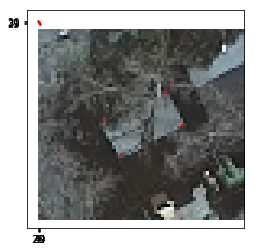

In [159]:
sample = building_dataset[330]
print(sample['image'].shape, sample['corners'].shape)
show_landmarks(**sample)